### Tensorflow 기초

In [22]:
import tensorflow as tf

1) 변수(tensor)를 선언할 때 3가지 타입이 있다.  
- tf.Variable :  변경 가능한 변수 (가장 사용多)  
- tf.constant : 변경 불가능  
- tf.placeholder : 자리지킴이(공간만 만듦, 자리 만들기, 실제 데이터는 넣지 않음.)

In [23]:
var1 = tf.Variable(5)        #build 해둔 상태 (switch 만들어준거지)
con1 = tf.constant(10)
plh1 = tf.placeholder(tf.int32) # type(필수,메모리 사이즈), shape(선택, 안쓰면 nun) 알려줘야해

2) tensor의 build와 run이 구분되어져있다.  
-  build : tensor의 구조도를 짜는 것
-  run : session을 이용해서 tensor를 실행하는 것

In [24]:
print(con1)

Tensor("Const_2:0", shape=(), dtype=int32)


어라? 10이 안나오고 이상한 영어가 나오네?

이상한 영어 : con1 tensor의 정보(info)  
- tensor("name", shape,type)

variable은 initialize라는 tensor가 필요!

In [25]:
init = tf.global_variables_initializer()

In [26]:
assign =tf.assign(var1, 25)

In [27]:
sess = tf. Session()  #session 열기    스위치 공사

con1_sess = sess.run (con1)  #sess : 특정 session을 running을 시킬 수 있는 애      원하는 스위치 클릭

print(con1_sess)

sess.run(init)
print('before: ', sess.run(var1))

sess.run(assign)

print('after: ' , sess.run(var1))

sess.close()

10
before:  5
after:  25


### neural networks 모델

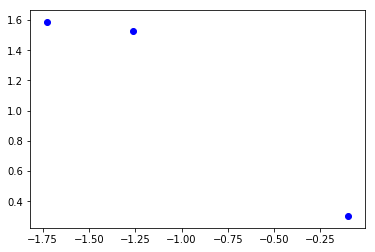

In [92]:
import numpy as np
from matplotlib import pyplot as plt
#100개의 데이터, feature = 2개
np.random.seed(30)
X = np.random.randn(4, 2)
y = np.logical_xor(X[:, 0]>0, X[:, 1]>0)
y = np.where(y, 1, -1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   shuffle=True)
plt.scatter(X_train[y_train==1, 0],
            X_train[y_train==1, 1], c='b')
plt.scatter(X_train[y_train==-1, 0], 
            X_train[y_train==-1, 1], c='r')
plt.show()

In [93]:
X = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

In [94]:
X = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

In [95]:
# wheiht값 만들기
W_1 = tf.Variable(tf.random_normal([2,1]))
b_1 = tf.Variable(tf.random_normal([10]))

hidden_1 = tf.sigmoid(tf.matmul(X , W_1) + b_1)


W_2 = tf.Variable(tf.random_normal([10,10]))
b_2 = tf.Variable(tf.random_normal([10]))

hidden_2 = tf.sigmoid(tf.matmul(hidden_1,W_2)+b_2)


W_3 = tf.Variable(tf.random_normal([10, 1]))
b_3 = tf.Variable(tf.random_normal([1]))

hypo = tf.sigmoid(tf.matmul(hidden_2, W_3) + b_3)

In [96]:
cost = -tf.reduce_mean(y*tf.log(hypo)+(1-y)*tf.log(1-hypo))  # reduction : 10개의 숫자 (10차원)중에 대표값 1개 뽑음

In [97]:
learning_rate = 1
op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [98]:
predict = tf.cast(hypo> 0.5, tf.float32)  # 1 or 0
              #cast : casting, 형변환 함수
acc=tf.cast(tf.equal(predict, y), tf.float32) #numpy와 비슷한 형식

In [99]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(100):
        sess.run(op, feed_dict={X: X_train, y: y_train})
    
        if i%10 ==0:
            print(sess.run(cost, feed_dict={X:X_train, y:y_train}))
            
    print('accuracy:\n', sess.run(acc, feed_dict={X: X_test, y: y_test}))

0.25642195
0.01904906
0.0099538835
0.006725777
0.0050739925
0.004071266
0.0033982475
0.0029153663
0.0025522301
0.002269162
accuracy:
 [[1.]]
